**LOGISTIC REGRESSION CLASS**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import copy
from sklearn.model_selection import train_test_split

class LogisticRegression_scratch:

  def __init__(self):
    self.dict_crop={}#class variable

  def sigmoid(self,z):
    #z=np.int256(z)
    a= 1 / (1 + np.exp(-z))
    return a

  def prediction(self,X):
    crop_enigma={'rice': 1, 'maize': 2, 'chickpea': 3, 'kidneybeans': 4, 'pigeonpeas': 5, 'mothbeans': 6, 'mungbean': 7, 'blackgram': 8, 'lentil': 9, 'pomegranate': 10, 'banana': 11, 'mango': 12, 'grapes': 13, 'watermelon': 14, 'muskmelon': 15, 'apple': 16, 'orange': 17, 'papaya': 18, 'coconut': 19, 'cotton': 20, 'jute': 21, 'coffee': 22}
    #inv_dict = {v: k for k, v in crop_enigma.items()}
    #print(inv_dict)
    crops=self.dict_crop.keys()
    m,n=np.shape(X)
    max_crop=[]
    max_value=[0]*m
    for crop in crops:

     for y in self.sigmoid(np.dot(X.T,self.dict_crop[crop][0])+self.dict_crop[crop][1]):
      if  y > max_value[-1]:
        max_crop.append(crop)
        max_value.append(y)


    return (crop_enigma[max_crop[-1]])



**CLASS EVALUATION**

In [ ]:
lr=LogisticRegression_scratch()
import pickle
obj=pickle.load(open("imp.pkl","rb"))
lr.dict_crop=obj
pickle.dump(lr,open("model.pkl","wb"))


**Importing the neccesary modules!**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import copy
from sklearn.model_selection import train_test_split

**SIGMOID FUNCTION**

In [ ]:
def sigmoid(z):
  #z=np.int256(z)
  a= 1 / (1 + np.exp(-z))
  return a

**COST FUNCTION**

In [ ]:
def find_cost(X,Y,lmbd=10):
  m,n=X.shape
  cost=0
  reg_cost=0

  Z=np.dot(X,W)+B
  A=sigmoid(Z)
  #print(W)
  cost = -(1/m)*(np.sum( Y*np.log(A) + (1-Y)*np.log(1-A)))

  #regularization
  #reg_cost=(lmbd/2*m)*np.sum(np.square(W))

  total_cost=(cost+reg_cost)
  return total_cost



**GRADIENT DESCENT**

In [ ]:
def find_grad_desc(X,Y,lr,lmbd=10):
  global W,B
  m,n=X.shape
  dj_dw=np.zeros((n,1))
  dj_db=0
  Z = np.dot(X,W) + B
  A = sigmoid(Z)
  dj_dw=((1/m) * np.dot(X.T, (A - Y)))
  dj_db=((1/m) * np.sum(A-Y))
  W=W-lr*dj_dw
  B=B-lr*dj_db

**PREDICT FUNCTION FOR BINARY CLASSIFICATION**

In [ ]:
def predict(X):
   return  [0 if y<=0.5 else 1 for y in sigmoid(np.dot(X,W)+B)]

**ACCURACY EVALUATION FUNCTION**

In [ ]:
def nijer_accuracy():
  global X_test,Y_test
  debu=predict(X_test)
  ctrl=0
  for i in range(len(debu)):
    if (debu[i]==Y_test[i]):
      ctrl+=1
  return (ctrl/(len(debu)))*100

**MAIN**

1760 7
(440, 7)


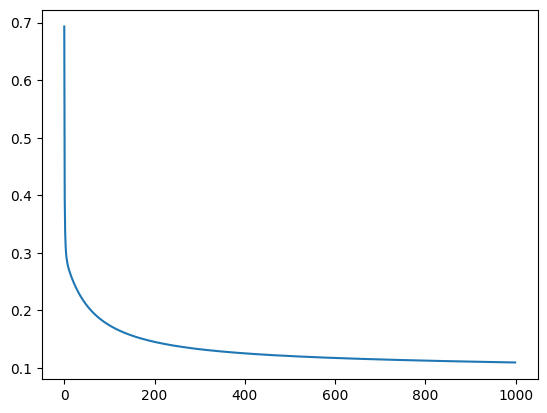

96.13636363636363 rice
1760 7
(440, 7)


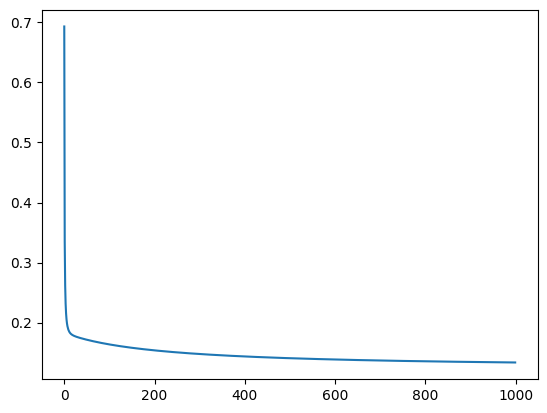

95.22727272727273 maize
1760 7
(440, 7)


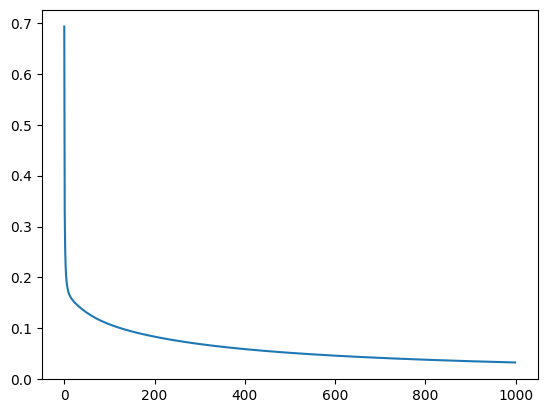

100.0 chickpea
1760 7
(440, 7)


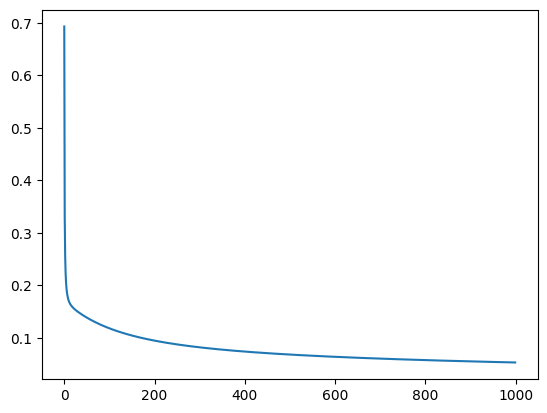

97.95454545454545 kidneybeans
1760 7
(440, 7)


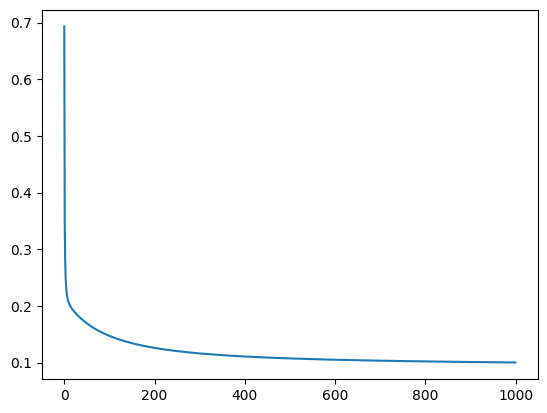

94.77272727272728 pigeonpeas
1760 7
(440, 7)


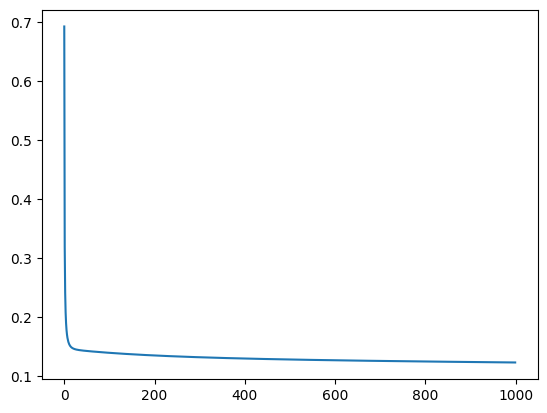

96.81818181818181 mothbeans
1760 7
(440, 7)


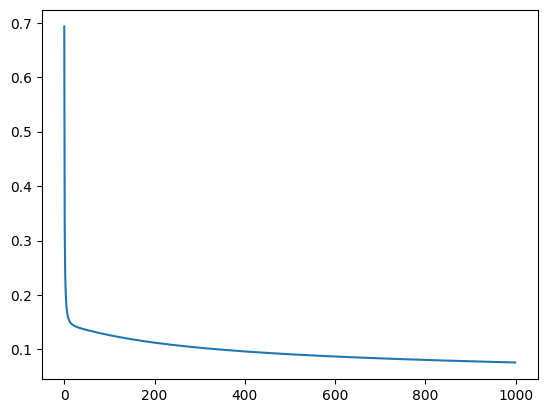

95.9090909090909 mungbean
1760 7
(440, 7)


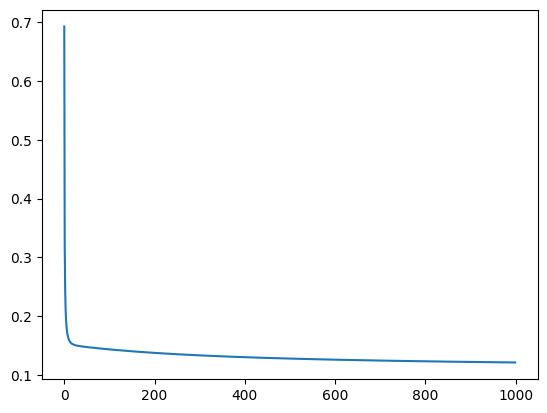

92.95454545454545 blackgram
1760 7
(440, 7)


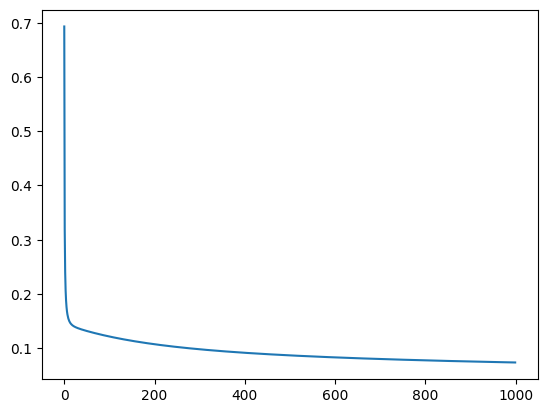

96.36363636363636 lentil
1760 7
(440, 7)


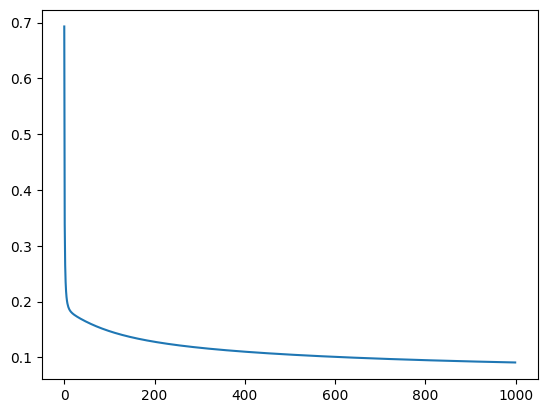

95.9090909090909 pomegranate
1760 7
(440, 7)


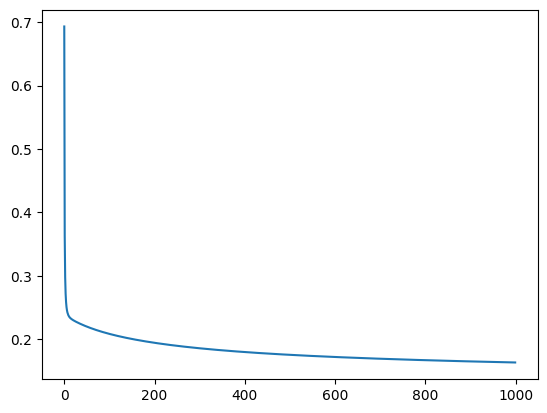

96.36363636363636 banana
1760 7
(440, 7)


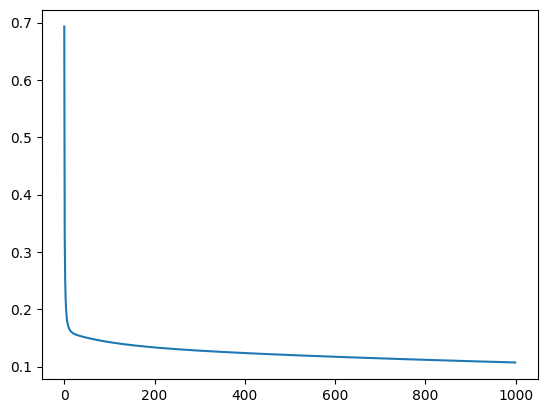

95.22727272727273 mango
1760 7
(440, 7)


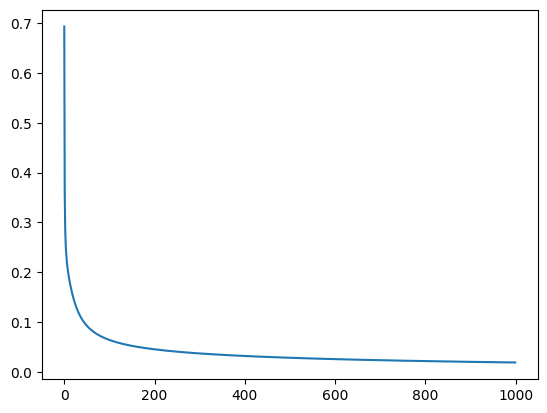

100.0 grapes
1760 7
(440, 7)


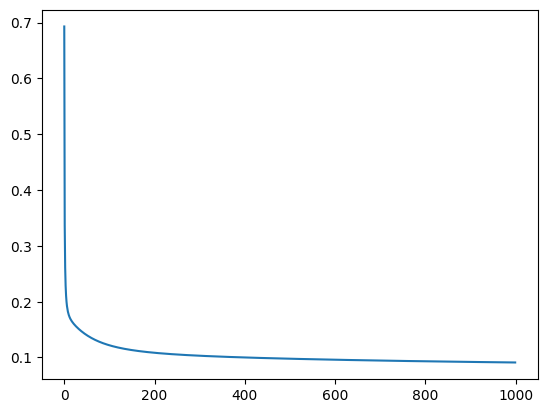

94.77272727272728 watermelon
1760 7
(440, 7)


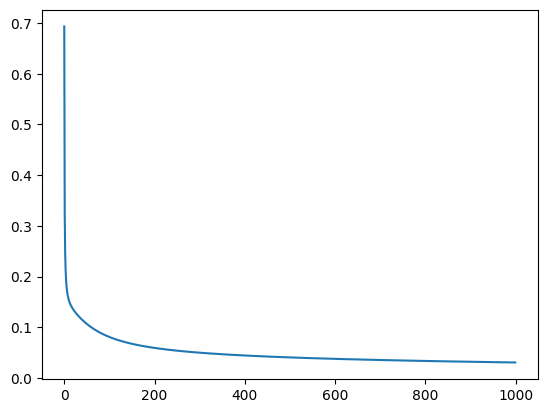

99.54545454545455 muskmelon
1760 7
(440, 7)


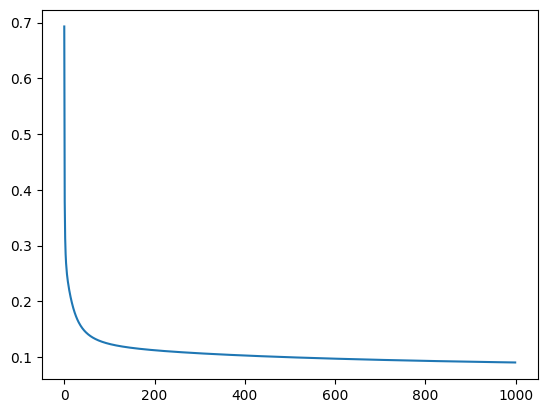

94.54545454545455 apple
1760 7
(440, 7)


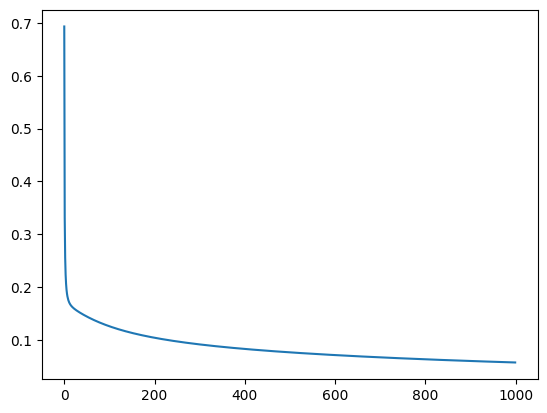

95.9090909090909 orange
1760 7
(440, 7)


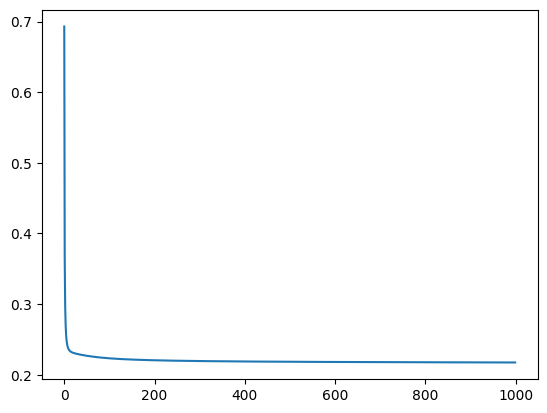

95.22727272727273 papaya
1760 7
(440, 7)


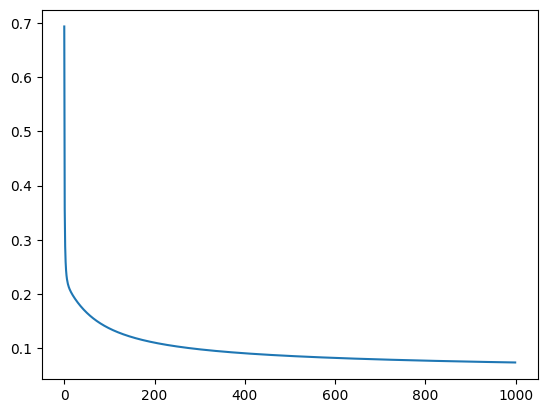

97.27272727272728 coconut
1760 7
(440, 7)


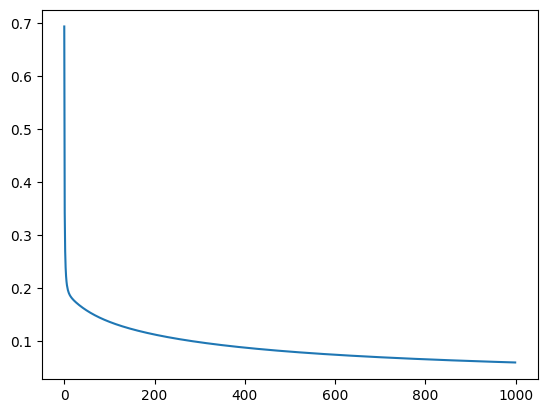

96.81818181818181 cotton
1760 7
(440, 7)


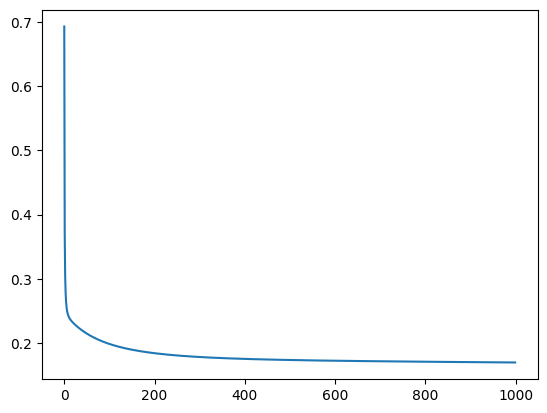

95.22727272727273 jute
1760 7
(440, 7)


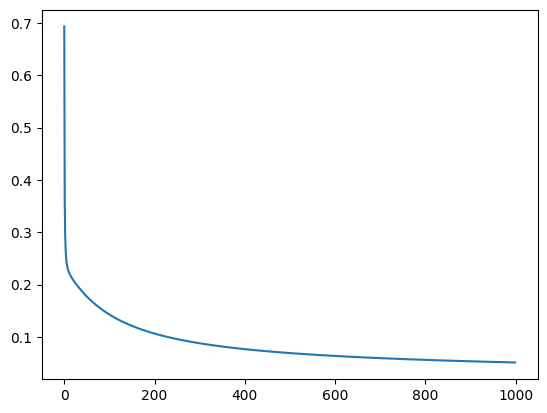

98.63636363636363 coffee


NameError: ignored

In [ ]:
data=pd.read_csv("Crop_recommendation.csv")
crop_values=data.label.unique()
length=data.shape[0]
for crop in crop_values:
  data[crop]=[0]*length
for crop in crop_values:
  for i in range(length):
    if data.iloc[i]['label']==crop:
      data.loc[i,crop]=1
dict_crop={}

s=0
for crop in crop_values:
  input_values=list(data.columns)[:7]
  X_train,X_test,Y_train,Y_test=train_test_split(data[input_values],data[[crop]],test_size=0.20)

  m,n=np.shape(X_train)
  print(m,n)
  W=np.zeros((n,1))
  B=0
  X_train=X_train.to_numpy()
  Y_train=Y_train.to_numpy()
  X_test=X_test.to_numpy()
  Y_test=Y_test.to_numpy()
  print(np.shape(X_test))
  fit(X_train,Y_train,1000)
  dict_crop[crop]=[W,B]

  y_results=nijer_accuracy()

  print(y_results,crop)
X_train,X_test,Y_train,Y_test=train_test_split(data[input_values],data[['label']],test_size=0.20)
print(multi_accuracy(X_test,Y_test,dict_crop),"All crops")

**TEST **

In [ ]:
data=pd.read_csv("Crop_recommendation.csv")
crop_values=data.label.unique()
length=data.shape[0]
for crop in crop_values:
  data[crop]=[0]*length
for crop in crop_values:
  for i in range(length):
    if data.iloc[i]['label']==crop:
      data.loc[i,crop]=1
dict_crop={}
X_train,X_test,Y_train,Y_test=train_test_split(data[input_values],data[['label']],test_size=0.20)
print(multi_accuracy(X_test,Y_test,dict_crop),"All crops")

 **Prediction for multiclass classification**

In [ ]:
def prediction(X,dict_crop):
  crops=dict_crop.keys()
  m,n=np.shape(X)
  max_crop=['none']*m
  max_value=[0]*m
  for crop in crops:
    i=0
    for y in sigmoid(np.dot(X,dict_crop[crop][0])+dict_crop[crop][1]): #W=dict_crop[crop][0] B=dict_crop[crop][1]
      if  y > max_value[i]:
        max_crop[i]=crop
        max_value[i]=y
      i+=1
  return max_crop

**CODE FOR MULTICLASS MODEL ACCURACY**

In [ ]:
def multi_accuracy(X,Y,dict_crop):
  max_crop=prediction(X,dict_crop)
  ctrl=0
  print(type(max_crop))
  Y=Y.to_numpy()
  for i in range(len(max_crop)):
    if max_crop[i]==Y[i]:
      ctrl+=1
  return (ctrl/(len(max_crop)))*100

**Fetching Dataset**

In [ ]:
global W, B
dataframe=pd.read_csv('URL fake or not.csv')
X_train,X_test,Y_train,Y_test=train_test_split(dataframe[['whois_regDate','whois_expDate','whois_updatedDate','dot_count','url_len','digit_count','special_count','hyphen_count','double_slash','single_slash','at_the_rate','protocol','protocol_count','web_traffic']],dataframe[['label']],test_size=0.20)

#dataframe=pd.read_csv("heart_failure_dataset.csv")
#X_train,X_test,Y_train,Y_test=train_test_split(dataframe[['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','time']],dataframe[['Fatality']],test_size=0.20)

m,n=np.shape(X_train)
W=np.zeros((n,1))
B=0
X_train=X_train.to_numpy()
Y_train=Y_train.to_numpy()
X_test=X_test.to_numpy()
Y_test=Y_test.to_numpy()

W_max=np.zeros((n,1))
B_max=0
accuracy_max=0

print(type(X_train))
print(m,n)
print(np.shape(Y_train))
print(np.shape(X_test))
print(np.shape(Y_test))
print(np.shape(W))



**Fit Function**

In [ ]:
def fit(X,Y,iterations):
  global W,B
  lr=0.0001
  iterations=1000
  cost_list=[]
  for i in range(iterations):
    cost=find_cost(X,Y)
    cost_list.append(cost)

    find_grad_desc(X,Y,lr)
    #y_results=nijer_accuracy()
    #print(y_results)
    #print(cost,i)
    #plt.plot(i,cost)
  plt.plot(np.arange(iterations),cost_list)
  plt.show()

Sk learn

In [ ]:
from sklearn.linear_model import LogisticRegression
"""dataframe=pd.read_csv('diabetes.csv')
x_train,x_test,y_train,y_test=train_test_split(dataframe[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']],dataframe['Outcome'],test_size=0.20)"""

#dataframe=pd.read_csv("heart_failure_dataset.csv")
#x_train,x_test,y_train,y_test=train_test_split(dataframe[['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','time']],dataframe[['Fatality']],test_size=0.20)

#dataframe=pd.read_csv('URL fake or not.csv')
#x_train,x_test,y_train,y_test=train_test_split(dataframe[['whois_regDate','whois_expDate','whois_updatedDate','dot_count','url_len','digit_count','special_count','hyphen_count','double_slash','single_slash','at_the_rate','protocol','protocol_count','web_traffic']],dataframe[['label']],test_size=0.20)

data=pd.read_csv("Crop_recommendation_dataset.csv")
crop_values=data.label.unique()
length=data.shape[0]
for crop in crop_values:
  data[crop]=[0]*length
for crop in crop_values:
  for i in range(length):
    if data.iloc[i]['label']==crop:
      data.loc[i,crop]=1

for crop in crop_values:
  input_values=list(data.columns)[:7]
  x_train,x_test,y_train,y_test=train_test_split(data[input_values],data[[crop]],test_size=0.20)
  logisticRegr = LogisticRegression(max_iter=100000)
  logisticRegr.fit(x_train, y_train)
  p=logisticRegr.predict(x_test)
  s=logisticRegr.score(x_test,y_test)
  print(s,crop)